<a href="https://colab.research.google.com/github/BiszakAletta/FAKT.ML.kurzus/blob/main/hatodikhazi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values

In [14]:
training_set

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [3]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [18]:
print(sc.fit_transform(training_set))

[[0.6202352 ]
 [0.62226277]
 [0.64436334]
 ...
 [0.16504461]
 [0.15896188]
 [0.16626115]]


In [5]:
X_train = []
y_train = []
for i in range(60, 2035):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train

In [6]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [7]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
62/62 [==============================] - 23s 61ms/step - loss: 0.0095
Epoch 2/100
62/62 [==============================] - 4s 61ms/step - loss: 0.0035
Epoch 3/100
62/62 [==============================] - 4s 61ms/step - loss: 0.0026
Epoch 4/100
62/62 [==============================] - 4s 61ms/step - loss: 0.0024
Epoch 5/100
62/62 [==============================] - 4s 60ms/step - loss: 0.0024
Epoch 6/100
62/62 [==============================] - 4s 61ms/step - loss: 0.0021
Epoch 7/100
62/62 [==============================] - 4s 61ms/step - loss: 0.0021
Epoch 8/100
62/62 [==============================] - 4s 61ms/step - loss: 0.0019
Epoch 9/100
62/62 [==============================] - 4s 61ms/step - loss: 0.0021
Epoch 10/100
62/62 [==============================] - 4s 61ms/step - loss: 0.0021
Epoch 11/100
62/62 [==============================] - 4s 60ms/step - loss: 0.0017
Epoch 12/100
62/62 [==============================] - 4s 61ms/step - loss: 0.0018
Epoch 13/100
62/62 [====

In [8]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values

In [9]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

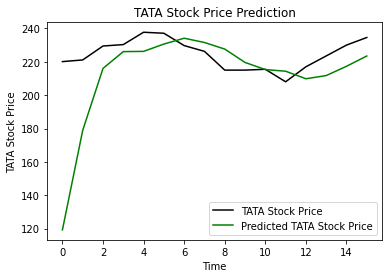

In [12]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color='green', label='Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

In [25]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
early_stopping_callback = EarlyStopping(patience=20, restore_best_weights=True)


In [26]:
#nem tesz bele earlystoppingot kipróbálom azzal is
model2 = Sequential()
model2.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model2.add(Dropout(0.2))
model2.add(LSTM(units=50,return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(units=50,return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(units=50))
model2.add(Dropout(0.2))
model2.add(Dense(units=1))
model2.compile(optimizer='adam',loss='mean_squared_error')
model2.fit(X_train,y_train,epochs=100,batch_size=32,validation_split=0.1, callbacks=[early_stopping_callback, tensorboard_callback])

Epoch 1/100
56/56 [==============================] - 13s 94ms/step - loss: 0.0097 - val_loss: 6.4354e-04
Epoch 2/100
56/56 [==============================] - 4s 63ms/step - loss: 0.0031 - val_loss: 6.8960e-04
Epoch 3/100
56/56 [==============================] - 4s 64ms/step - loss: 0.0030 - val_loss: 5.8586e-04
Epoch 4/100
56/56 [==============================] - 4s 66ms/step - loss: 0.0026 - val_loss: 5.3614e-04
Epoch 5/100
56/56 [==============================] - 4s 66ms/step - loss: 0.0028 - val_loss: 7.2871e-04
Epoch 6/100
56/56 [==============================] - 4s 64ms/step - loss: 0.0022 - val_loss: 4.7781e-04
Epoch 7/100
56/56 [==============================] - 4s 67ms/step - loss: 0.0021 - val_loss: 4.6142e-04
Epoch 8/100
56/56 [==============================] - 4s 67ms/step - loss: 0.0020 - val_loss: 4.4979e-04
Epoch 9/100
56/56 [==============================] - 4s 64ms/step - loss: 0.0023 - val_loss: 4.2247e-04
Epoch 10/100
56/56 [==============================] - 4s 63ms/s

Early stoppingot leehet bele tenni?
Minmaxscaler ebben az esetben azért van, mert itt számít az értékek különbsége nem úgy mint a szövegnél, csak normalizáljuk 0,1 közé?
https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/


In [ ]:
#megállította 29 epochnál

In [27]:
predicted_stock_price2 = model2.predict(X_test)
predicted_stock_price2 = sc.inverse_transform(predicted_stock_price2)

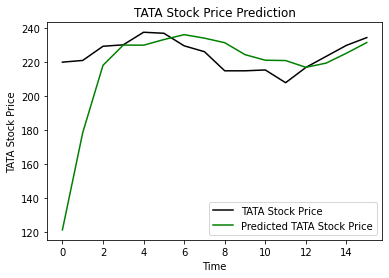

In [28]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price2, color='green', label='Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

In [ ]:
#egy kicsit másmilyen lett az ábra alapján - hogyan lehetne eldönteni, hogy melyik a jobb?